In [77]:
import plotly
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd
from glob import glob
import os



# CNC 설명 및 연구 목표

`-` 본 연구에서 사용된 데이터는 전북대학교 부속공장의 CNC공작기계로부터 생성된 데이터입니다.

>  **cnc가 대체 뭐야?**

* CNC(computer numerical control)는 흔히 공작기계라고 합니다. 다양한 절삭공구를 사용할 수 있을 뿐만 아니라, 다양한 재료를 정밀하게 제작할 수 있습니다. 모든 작업은 컴퓨터를 통해 자동으로 처리됩니다.

* 또한 모든 작업이 컴퓨터를 통해 처리되기에 작동자가 원하는 가공조건하에서 재료를 정밀하게 제작할수 있다!

> EX: CNC 절삭공구의 속도, 전력량.. 등등

## `-` **우리 실험실에서의 목표!**

* CNC의 절삭공구에 마모가 발생하게 되면 생성되는 **`절삭품의 품질이 저하된다!`**

* 그렇기에 CNC 공구에 부하는 전류를 통해의 **`마모를 간접적으로 예측`** 하면 절삭품의 `품질 저하를 방지`할수 있을것이다! 



* 또한 CNC 공구는 다양한 조건에서 가공이 되기때문에, 실험시에 다양한 조건을 주며 실험을 하고, **`어떠한 가공조건에서는 공구의 마모를 예측해보자!`**

`-` SUB 설명


**그런데 공구의 마모예측에 왜 부하 전류를 사용하냐?** 


`-` 사실 마모를 측정하는데에는 사진을 찍어서 하면 제일 좋지만 실험실 조건상 실시간 이미지 데이터 수집이 어려웠기에 모터에 부하는 전류를 이용해서 CNC 공구의 마모를 간접측정 하고자 하였다.


`-` 전류 부하가 공구의 마모의 간접지표가 되는 이유는 물리적인 이유도 엄청 많다... 하지만! 깃허브에서는 간단하게 원리만 설명!
> 우리가 새로운 칼을 통해 고기를 자를때와 날이 무딘 칼로 고기를 자를때 어떤 칼을 사용때 더많은 힘을 사용하게 될까? -> 바로 날이 무딘칼이다!


> 똑같은 원리로 공구에 마모가 발생하게 되면 그만큼 힘이 더 필요하게 되고, 공구에 부하되는 전류랑은 증가한다!

# 실험설명

## 본격적인 eda 앞서, 데이터 구성

* 총 데이터는 약 80만개

* cnc의 가공조건을 달리하여 데이터를 수집하였다. 

* 아래의 EDA에 사용된 데이터는 여러 실험중 하나이다.

### 데이터 구성 설명

`-` 14번- feed 120 (14번째 실험, feed(=공구의 속도)는 120)

- 1회 가공
- 2회 가공


     ~ 
     
     
- 14회 가공 

> 공구가 마모될때 까지 가공 하였기에, 실험마다 가공횟수는 다르다.



# DATA EDA 및 파생변수 생성

In [78]:
# 데이터 파일 경로
data = 'C:\\Users\\31083\\Documents\\GitHub\\Project\\CNC_Model_Integrated\\Data'
data

'C:\\Users\\31083\\Documents\\GitHub\\Project\\CNC_Model_Integrated\\Data'

In [79]:
# 데이터 프레임
cnc = []  # 데이터 프레임을 저장할 리스트

cnc_visualize = [] # 시각화용 데이터프레임 (전처리 x)
for i in range(1, 15):
    file_path = f"{data}\\2022.12.02(14번 - feed 120)\\{i}번째 데이터.csv"
    df = pd.read_csv(file_path, skiprows=1)
    cnc.append(df)
    cnc_visualize.append(df)

In [80]:
# 1회 가공시 
cnc[0]

,hh:mm:ss:ms,Sampling Interval,Block No,G-code,G80,M-code,Start,mode,x,y,...,C1,C2,C3,C4,A1,A1h,A1 chatter,A2,A2H,A2 chatter
0,13:44:12:341,0,0,1,0,5,0,1,0.0,0.0,...,0.2109,0.1969,50.7299,50.6986,0.0,0.0,0.0,0.0,0.0,0.0
1,13:44:12:401,60,0,1,0,5,0,1,0.0,0.0,...,0.2109,0.1953,50.7314,50.6986,0.0,0.0,0.0,0.0,0.0,0.0
2,13:44:12:521,120,0,1,0,5,0,1,0.0,0.0,...,0.2109,0.1953,50.7299,50.7002,0.0,0.0,0.0,0.0,0.0,0.0
3,13:44:12:641,120,0,1,0,5,0,1,0.0,0.0,...,0.2094,0.1953,50.7299,50.7002,0.0,0.0,0.0,0.0,0.0,0.0
4,13:44:12:761,120,0,1,0,5,0,1,0.0,0.0,...,0.2094,0.1969,50.7299,50.6986,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,13:48:26:739,120,154,0,0,9,0,1,0.0,0.0,...,68.0007,67.9414,50.7361,50.7017,0.0,0.0,0.0,0.0,0.0,0.0
2120,13:48:26:859,120,154,0,0,5,0,1,0.0,0.0,...,100.4457,100.4129,50.7346,50.7033,0.0,0.0,0.0,0.0,0.0,0.0
2121,13:48:26:979,120,154,0,0,5,0,1,0.0,0.0,...,101.3676,101.3676,50.7361,50.7017,0.0,0.0,0.0,0.0,0.0,0.0
2122,13:48:27: 99,120,154,0,0,5,0,1,0.0,0.0,...,101.3426,100.6067,50.7424,50.6971,0.0,0.0,0.0,0.0,0.0,0.0


## `-` 변수 종류

| 변수명              | 설명                                          |
|:-------------------|:----------------------------------------------|
| Time              | 시간                                          |
| Sampling Interval | 시간 간격                                     |
| Block No          | 블락 번호 (G                                  |
| G-code            | G-code (가공 방식을 나타내는 코드)              |
| G80               | 싸이클 취소 실행                               |
| M-code            | M-code                                        |
| Start             |                                               |
| mode              | Operation mode                               |
| x                 | 공구의 x-좌표                                 |
| y                 | 공구의 y-좌표                                 |
| z                 | 공구의 z-좌표                                 |
| a                 | x 회전축                                      |
| b                 | y 회전축                                      |
| c                 | z 회전축                                      |
| spindle load      | 제어를 위해 입력한 spindle load               |
| command RPM       | 제어를 위해 입력한 spindle의 회전 속도         |
| command Feedrate  | 제어를 위해 입력한 이송속도                    |
| actual RPM        | 측정된 스핀들의 회전속도 (RPM)               |
| actual Feedrate   | 측정된 스핀들의 이송속도 (mm/min)             |
| actLoad           | 전류로 측정되는 공구 load 값                   |
| Ref_upper         |                                               |
| Ref_lower         |                                               |
| PLCFOV            |                                               |
| cmdFOV            | AFC 지령 override 값                         |
| cmdSOV            | ASC 스핀들 override 값                        |
| userASCON         | 채터 (chatter) 제거 (0: off, 1: on)            |
| userAFCon         | 적응제어 (0: off, 1: on)                       |
| n                 | (명령어) 라인 번호                            |
| AdaptiveOn        | 적응제어 (                                     |
| TWon              | 공구마모진단 여부                              |
| C1                | 전류센서1                                     |
| C2                | 전류센서2                                     |
| C3                | 전류센서3                                     |
| C4                | 전류센서4                                     |
| A1                | 가속도 센서1의 RMS                            |
| A1h               | 가속도 센서1의 harmonic                      |
| A1 chatter        | 채터 발생 여부 (0: 정상, 1: 채터발생)            |
| A2                | 가속도 센서2의 RMS                            |
| A2H               | 가속도 센서2의 harmonic                      |
| A2 chatter        | 채터 발생 여부 (0: 정상, 1: 채터발생)            |


In [81]:
print('변수 개수 : ', len(cnc[0].columns))

print('변수 종류 : ', cnc[0].columns)

변수 개수 :  39
변수 종류 :  Index(['hh:mm:ss:ms', ' Sampling Interval', ' Block No', ' G-code', ' G80',
       ' M-code', ' Start', ' mode', ' x', ' y', ' z', ' a', ' b', ' c',
       ' spindle load', ' command RPM', ' command Feedrate', ' actual RPM',
       ' actual Feedrate', ' actLoad', ' Ref_upper', ' Ref_lower', ' PLCFOV',
       ' cmdFOV', ' cmdSOV', ' userASCOn', ' userAFCon', ' AdaptiveOn',
       ' TWon', ' C1', ' C2', ' C3', ' C4', ' A1', ' A1h', ' A1 chatter',
       ' A2', ' A2H', ' A2 chatter'],
      dtype='object')


In [82]:
drop = ['hh:mm:ss:ms', ' Sampling Interval', ' Block No', ' G-code', ' G80',
          ' M-code', ' Start', ' mode', ' a', ' b', ' c',
          ' command RPM', ' command Feedrate', ' actLoad',
          ' Ref_upper', ' Ref_lower', ' PLCFOV',
          ' cmdFOV', ' cmdSOV', ' userASCOn', ' userAFCon',
          ' TWon', ' C2', ' C3', ' C4', ' A1', ' A1h', ' A1 chatter',
          ' A2', ' A2H', ' A2 chatter',' AdaptiveOn']

cnc[0] = cnc[0].drop(drop,axis = 1)

`-` 변수는 다양하지만 본연구 에서 사용될변수는 다음과 같다.

In [83]:
print('변수 개수 : ', len(cnc[0].columns))

print('변수 종류 : ', cnc[0].columns)

변수 개수 :  7
변수 종류 :  Index([' x', ' y', ' z', ' spindle load', ' actual RPM', ' actual Feedrate',
       ' C1'],
      dtype='object')


### `-` 결과 변수 -> C1( 전류데이터)

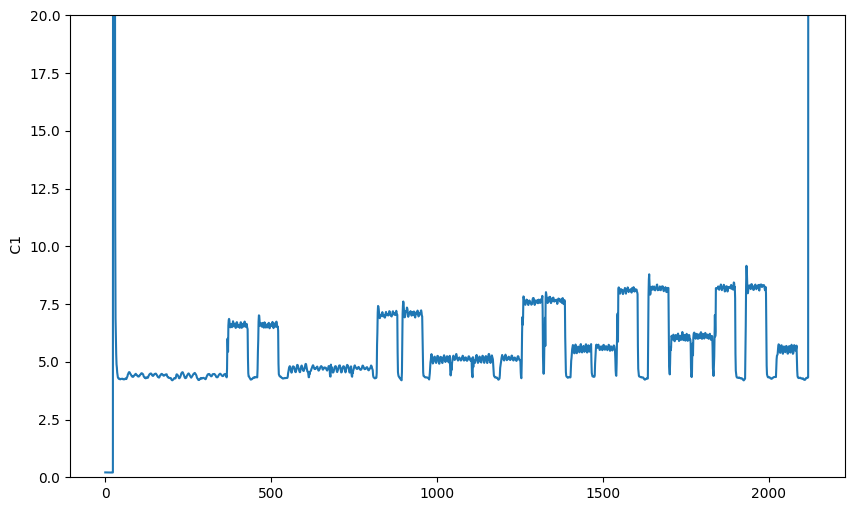

In [84]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=cnc[0], x=cnc[0].index, y=' C1')

plt.ylim(0, 20)
plt.show()

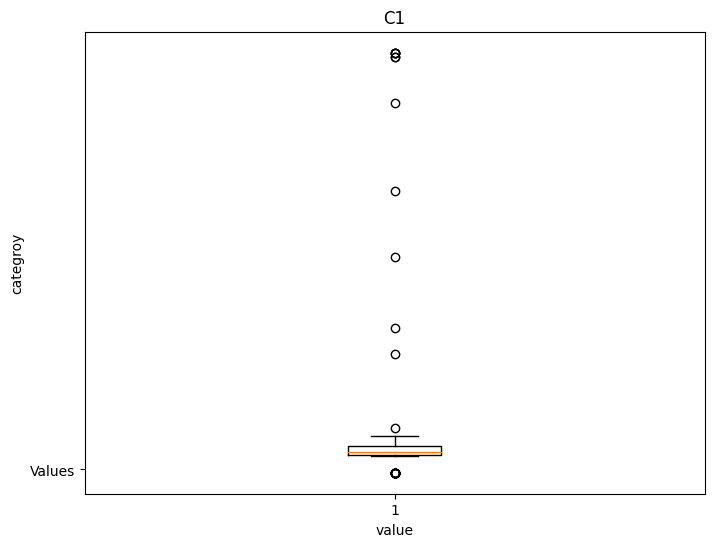

In [85]:
plt.figure(figsize=(8, 6))
plt.boxplot(cnc[0][' C1'], vert=True)
plt.xlabel('value')
plt.ylabel('categroy')
plt.title('C1')
plt.yticks([1], ['Values'])
plt.show()

`-` **이상치 존재 이유 및 제거이유 설명**


* 본 연구에서 사용된 CNC 좌표 시각화

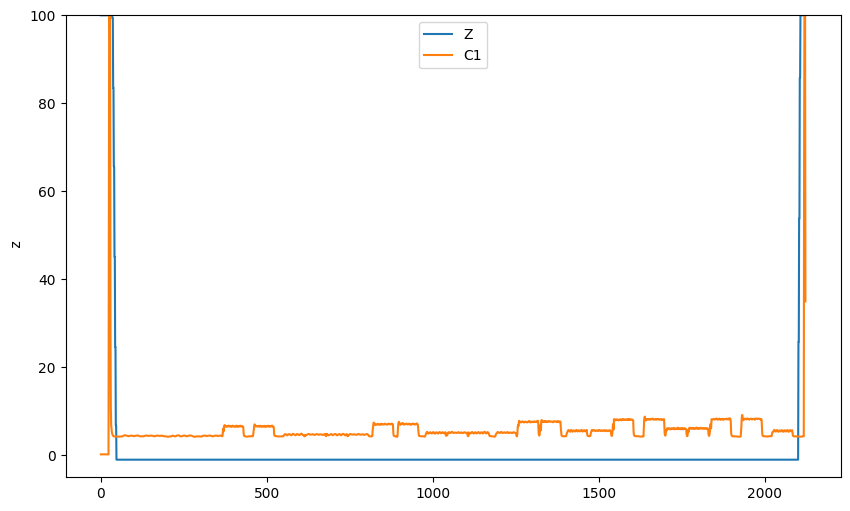

In [86]:


plt.figure(figsize=(10, 6))

sns.lineplot(data=cnc_visualize[0], x=cnc_visualize[0].index, y=' z', label='Z')
sns.lineplot(data=cnc_visualize[0], x=cnc_visualize[0].index, y=' C1', label='C1')

plt.ylim(-5, 100)
plt.legend()
plt.show()


* 본 연구에서는 z축이` -1(cnc의 공구가 절삭품의 표면에 닿는 지점 )` 일때 가공을 시작하는것으로 설정하였다.

* CNC 기계는 Z축이 -1이 되기 전까지 전류가 매우 높다.

* 또한 이 프로젝트의 목표는 CNC가 가공중일때만의 전류를 예측하는것이 목표이였기에, `Z축이 -1이 아닌 데이터`는 다 **`제거`** 한다.

#### - C1 이상치 제거

In [87]:
# z값 -1만 
for i in range(len(cnc)):
    cnc[i] = cnc[i][cnc[i][' z']  == -1  ]

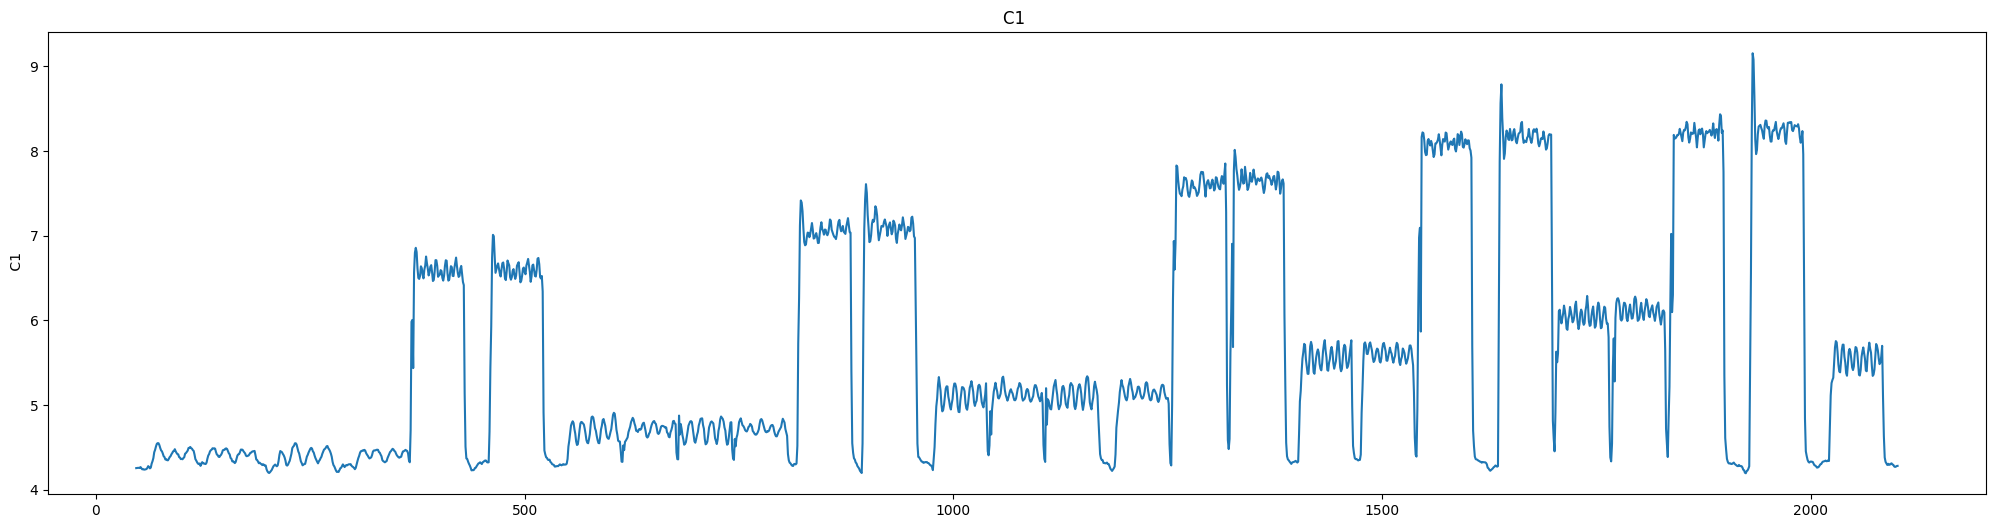

In [88]:
plt.figure(figsize=(25, 6))

sns.lineplot(data=cnc[0], x=cnc[0].index, y=' C1')

plt.title('C1 ')
plt.show()

### C1(전류) 데이터 특징

#### 1. 소재 진입시 충돌에 의한 전류의 급상승

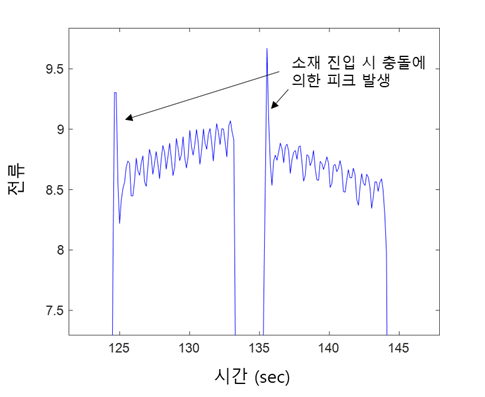

#####  **전류의 급상승 원인**

* CNC 가공시에 X축과 Y축을 변경하면서 가공을 진행한다.

`-` 가공 경로 

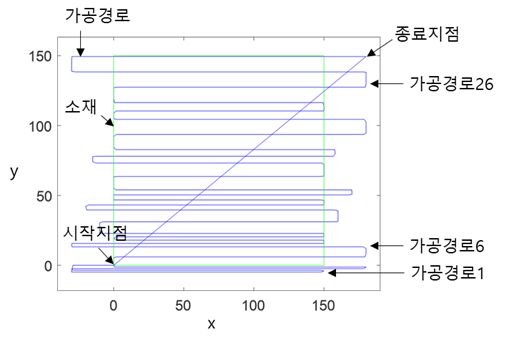

* 가공경로가 변경시에  절삭품을 벗어난 후에 재진입 하는 경로가 있다 (EX: 가공경로 6,26)

* 이는 소재 바깥에서 공구가 진입할 때 `소재와 충돌`이 나면서 발생하는 전류 부하 이다. 

* 이는 가공에서는 이러한 충돌이 공구에 부하를 주므로 피하는 방식으로 동작이 설계되는 것이 중요하다.

#### 2. 가공경로별 다른 전류량

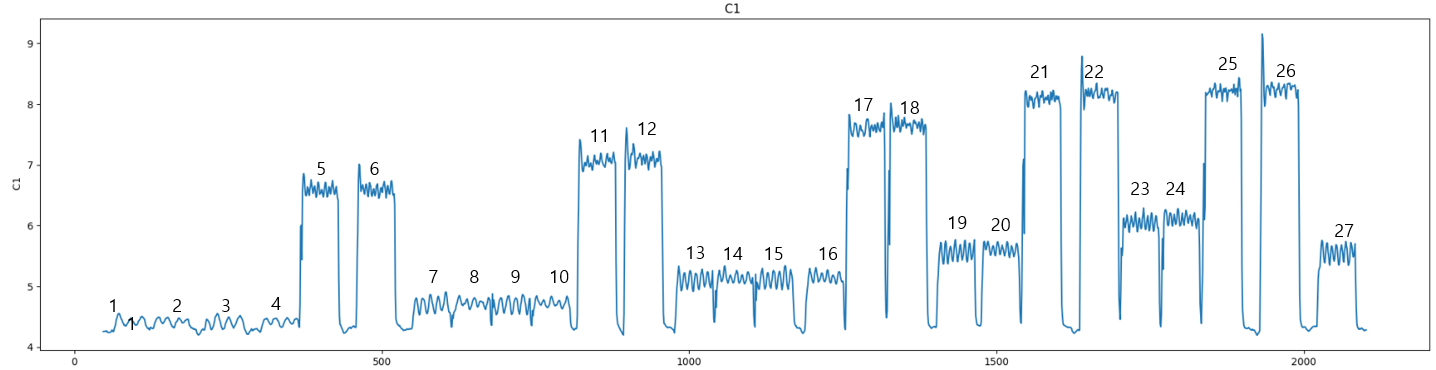

**이유**

`첫번째.`  경로별 `절삭폭`이 다르기 때문이다.

**절삭폭이란?**

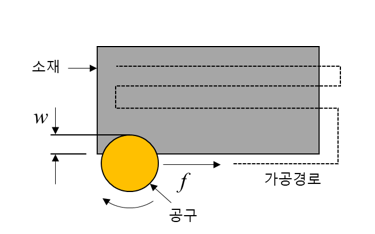

* 절삭폭 (Cutting width): 공구의 단면과 가공 재료의 겹침 폭, 다시 말해 **`절삭되는 두께`** 를 의미한다.

> **즉 . 절삭폭이 크다는것은 한번에 더 넓은 영역을 절단. -> 공구 부하의 증가 (= 전류부하의 증가)**

#####  **파생변수 생성** (절삭폭)

* Raw data에는 절삭폭변수가 없기에 생성.

In [96]:
cnc[0]['width'] = np.nan

# width 변수 생성

cnc[0]['width'].iloc[0] = 8 + cnc[0][' y'].iloc[0]  

# 초기의 절삭폭 계산: 공구의 반지름(8mm) - y좌표

In [98]:
for m in range(1, len(cnc[0])):
    # 인덱스에 맞게 반복문을 실행하도록 조정
    cnc[0].loc[m, 'width'] = cnc[0].loc[m, ' y'] - cnc[0].loc[m-1, ' y']
    
    if cnc[0].loc[m, ' y'] - cnc[0].loc[m-1, ' y'] == 0:
        
        cnc[0].loc[m, 'width'] = cnc[0].loc[m-1, 'width']

KeyError: 1

In [94]:
cnc[0]

,x,y,z,spindle load,actual RPM,actual Feedrate,C1,width
47,-29.769,-4.8,-1.0,0,4000,210,4.2560,3.2
48,-29.769,-4.8,-1.0,0,4000,210,4.2576,0.0
49,-25.464,-4.8,-1.0,0,3999,1200,4.2591,0.0
50,-25.464,-4.8,-1.0,0,3999,1200,4.2591,0.0
51,-20.344,-4.8,-1.0,0,4000,1200,4.2576,0.0
...,...,...,...,...,...,...,...,...
2097,171.936,149.4,-1.0,0,3999,1200,4.2763,0.0
2098,177.056,149.4,-1.0,0,3999,1200,4.2701,0.0
2099,177.056,149.4,-1.0,0,3999,1200,4.2732,0.0
2100,180.000,149.4,-1.0,0,3999,452,4.2810,0.0
